In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [77]:
frame = pd.read_parquet('D:\\Backup Daniel\\projetos\\bolsa\\historicos\\dados.parquet')
frame.head()

,data,fechamento_petr,abertura_petr,maxima_petr,minima_petr,volume_petr,variacao_petr,fechamento_petroleo,abertura_petroleo,maxima_petroleo,minima_petroleo,volume_petroleo,variacao_petroleo
0,2019-12-30,30.18,30.55,30.71,30.15,22110000,"-1,11%",68.44,68.20,68.99,68.16,29420,"0,41%"
1,2019-12-27,30.52,30.69,30.92,30.29,25000000,"0,10%",68.16,67.91,68.33,67.57,112220,"0,35%"
2,2019-12-26,30.49,30.17,30.51,30.09,24810000,"1,33%",67.92,67.27,67.99,67.22,69820,"1,07%"
3,2019-12-23,30.09,29.78,30.09,29.62,21970000,"0,80%",66.39,66.15,66.62,65.81,130190,"0,38%"
4,2019-12-20,29.85,30.18,30.18,29.61,93060000,"-1,13%",66.14,66.56,66.72,65.70,210550,"-0,60%"


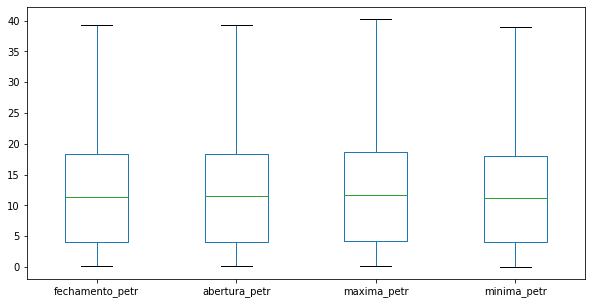

In [19]:
frame[['fechamento_petr', 'abertura_petr', 'maxima_petr', 'minima_petr']].boxplot(figsize=(10,5), grid=False)

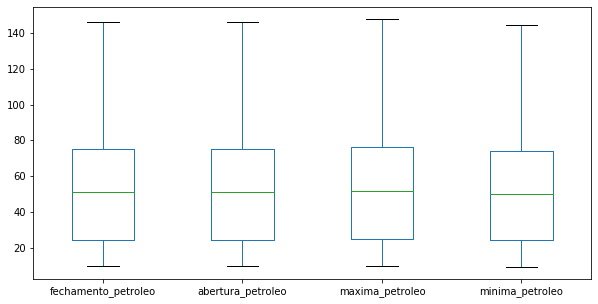

In [20]:
frame[['fechamento_petroleo', 'abertura_petroleo', 'maxima_petroleo', 'minima_petroleo']].boxplot(figsize=(10,5), grid=False)

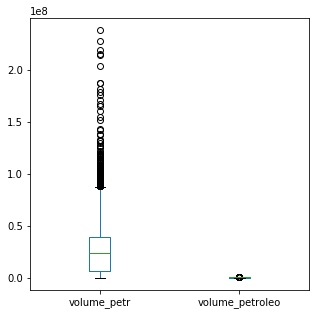

In [23]:
frame[['volume_petr', 'volume_petroleo']].boxplot(figsize=(5,5), grid=False)

In [69]:
frame[['fechamento_petr', 'fechamento_petroleo']].describe()

,fechamento_petr,fechamento_petroleo
count,6350.000000,6350.000000
mean,11.978372,54.355564
std,8.916591,33.162302
min,0.100000,9.640000
25%,4.100000,24.580000
50%,11.445000,50.940000
75%,18.380000,75.287500
max,39.310000,146.080000


In [71]:
frame[frame.fechamento_petroleo==frame.fechamento_petroleo.max()]

,data,fechamento_petr,abertura_petr,maxima_petr,minima_petr,volume_petr,variacao_petr,fechamento_petroleo,abertura_petroleo,maxima_petroleo,minima_petroleo,volume_petroleo,variacao_petroleo
2838,2008-07-03,31.86,33.14,33.47,31.66,16890000,"-3,25%",146.08,144.76,146.69,144.18,76770,"1,26%"


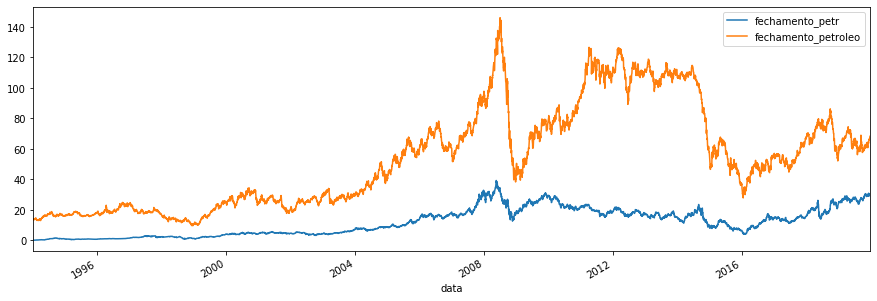

In [49]:
frame.plot(kind='line', y=['fechamento_petr', 'fechamento_petroleo'], x='data', figsize=(15,5))

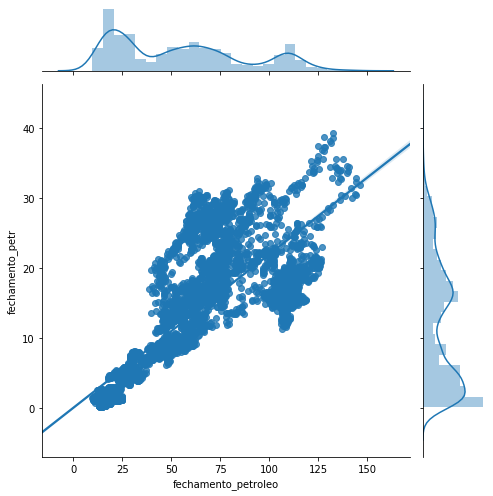

In [55]:
g = sns.jointplot(x="fechamento_petroleo", y="fechamento_petr", data=frame,
                  kind="reg", truncate=False,
                  height=7)

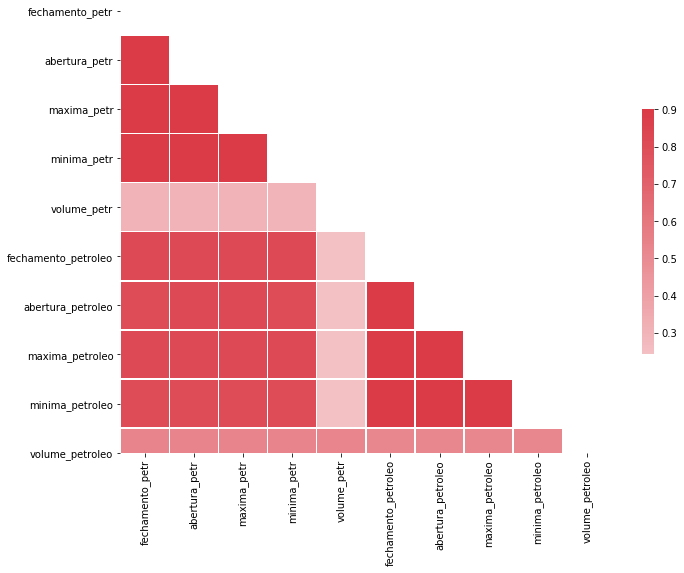

In [78]:
corr = frame.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [79]:
frame['gap_petr'] = (frame['abertura_petr']/frame['fechamento_petr'].shift(1))-1
frame['gap_petroleo'] = (frame['abertura_petroleo']/frame['fechamento_petroleo'].shift(1))-1
frame['valor_abertura_petr_futuro'] = frame['abertura_petr'].shift(-1)
frame['valor_abertura_petroleo_futuro'] = frame['abertura_petroleo'].shift(-1)
frame['target'] = frame['fechamento_petr'].shift(-1)

frame.dropna(inplace=True)

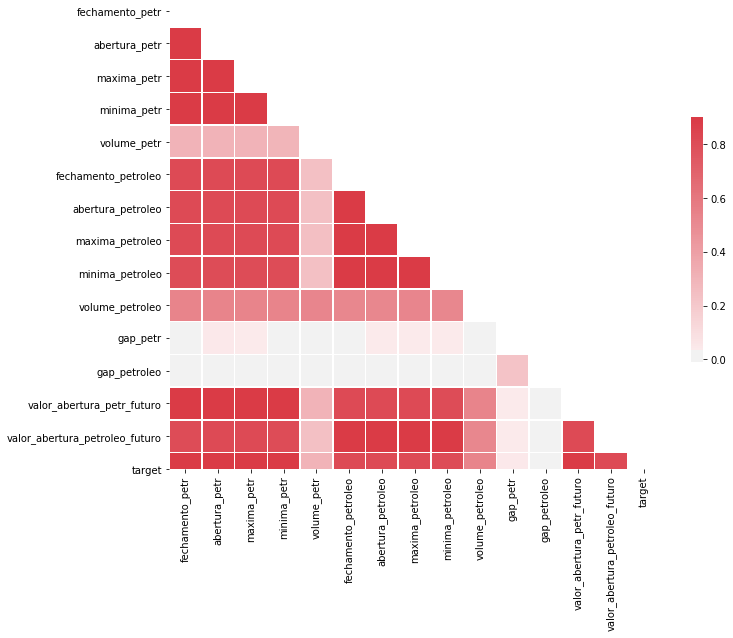

In [80]:
corr = frame.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [81]:
corr

,fechamento_petr,abertura_petr,maxima_petr,minima_petr,volume_petr,fechamento_petroleo,abertura_petroleo,maxima_petroleo,minima_petroleo,volume_petroleo,gap_petr,gap_petroleo,valor_abertura_petr_futuro,valor_abertura_petroleo_futuro,target
fechamento_petr,1.000000,0.999388,0.999685,0.999715,0.303781,0.815656,0.815294,0.817656,0.813500,0.539048,0.028251,-0.010098,0.998520,0.814440,0.999135
abertura_petr,0.999388,1.000000,0.999751,0.999672,0.304175,0.815881,0.815850,0.818075,0.813878,0.539775,0.044070,-0.003367,0.999039,0.815040,0.999692
maxima_petr,0.999685,0.999751,1.000000,0.999573,0.309075,0.816350,0.816198,0.818525,0.814241,0.540857,0.037143,-0.005505,0.998888,0.815399,0.999513
minima_petr,0.999715,0.999672,0.999573,1.000000,0.298928,0.815439,0.815172,0.817441,0.813395,0.538337,0.035406,-0.007807,0.998738,0.814273,0.999434
volume_petr,0.303781,0.304175,0.309075,0.298928,1.000000,0.244935,0.245039,0.247194,0.243006,0.530334,0.011490,-0.007660,0.304095,0.245117,0.303744
fechamento_petroleo,0.815656,0.815881,0.816350,0.815439,0.244935,1.000000,0.999446,0.999729,0.999774,0.525106,0.035300,-0.002808,0.816258,0.998856,0.816135
abertura_petroleo,0.815294,0.815850,0.816198,0.815172,0.245039,0.999446,1.000000,0.999759,0.999707,0.525878,0.039554,0.015719,0.816477,0.999376,0.816288
maxima_petroleo,0.817656,0.818075,0.818525,0.817441,0.247194,0.999729,0.999759,1.000000,0.999632,0.527934,0.037797,0.007231,0.818568,0.999202,0.818402
minima_petroleo,0.813500,0.813878,0.814241,0.813395,0.243006,0.999774,0.999707,0.999632,1.000000,0.523149,0.037130,0.005007,0.814315,0.999058,0.814177
volume_petroleo,0.539048,0.539775,0.540857,0.538337,0.530334,0.525106,0.525878,0.527934,0.523149,1.000000,0.029206,0.006177,0.540314,0.526602,0.539690


In [74]:
frame.head()

,data,fechamento_petr,abertura_petr,maxima_petr,minima_petr,volume_petr,variacao_petr,fechamento_petroleo,abertura_petroleo,maxima_petroleo,minima_petroleo,volume_petroleo,variacao_petroleo,gap,gap_petroleo,fechamento_futuro,abertura_futuro,abertura_futuro_petroleo
1,2019-12-27,30.52,30.69,30.92,30.29,25000000,"0,10%",68.16,67.91,68.33,67.57,112220,"0,35%",0.016899,-0.007744,30.49,30.17,67.27
2,2019-12-26,30.49,30.17,30.51,30.09,24810000,"1,33%",67.92,67.27,67.99,67.22,69820,"1,07%",-0.011468,-0.013058,30.09,29.78,66.15
3,2019-12-23,30.09,29.78,30.09,29.62,21970000,"0,80%",66.39,66.15,66.62,65.81,130190,"0,38%",-0.023286,-0.026060,29.85,30.18,66.56
4,2019-12-20,29.85,30.18,30.18,29.61,93060000,"-1,13%",66.14,66.56,66.72,65.70,210550,"-0,60%",0.002991,0.002561,30.19,30.04,66.19
5,2019-12-19,30.19,30.04,30.33,30.01,39700000,"0,23%",66.54,66.19,66.78,66.03,229210,"0,56%",0.006365,0.000756,30.12,29.35,65.84


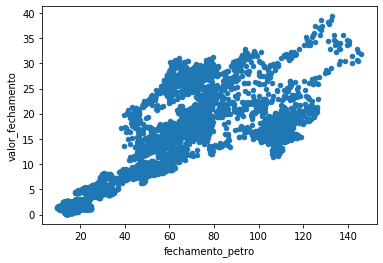

In [10]:
frame.to_parquet()